# Assignment 5:
    Take all the columns in mall_customers.csv
    
    gender age annual income spending score
    
    perform label encoding on gender
    
    train your data
    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
import seaborn as sns


In [2]:
df = pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
corr=df.corr()
corr

C:\Users\srikr\AppData\Local\Temp\ipykernel_18664\3182140910.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<AxesSubplot: >

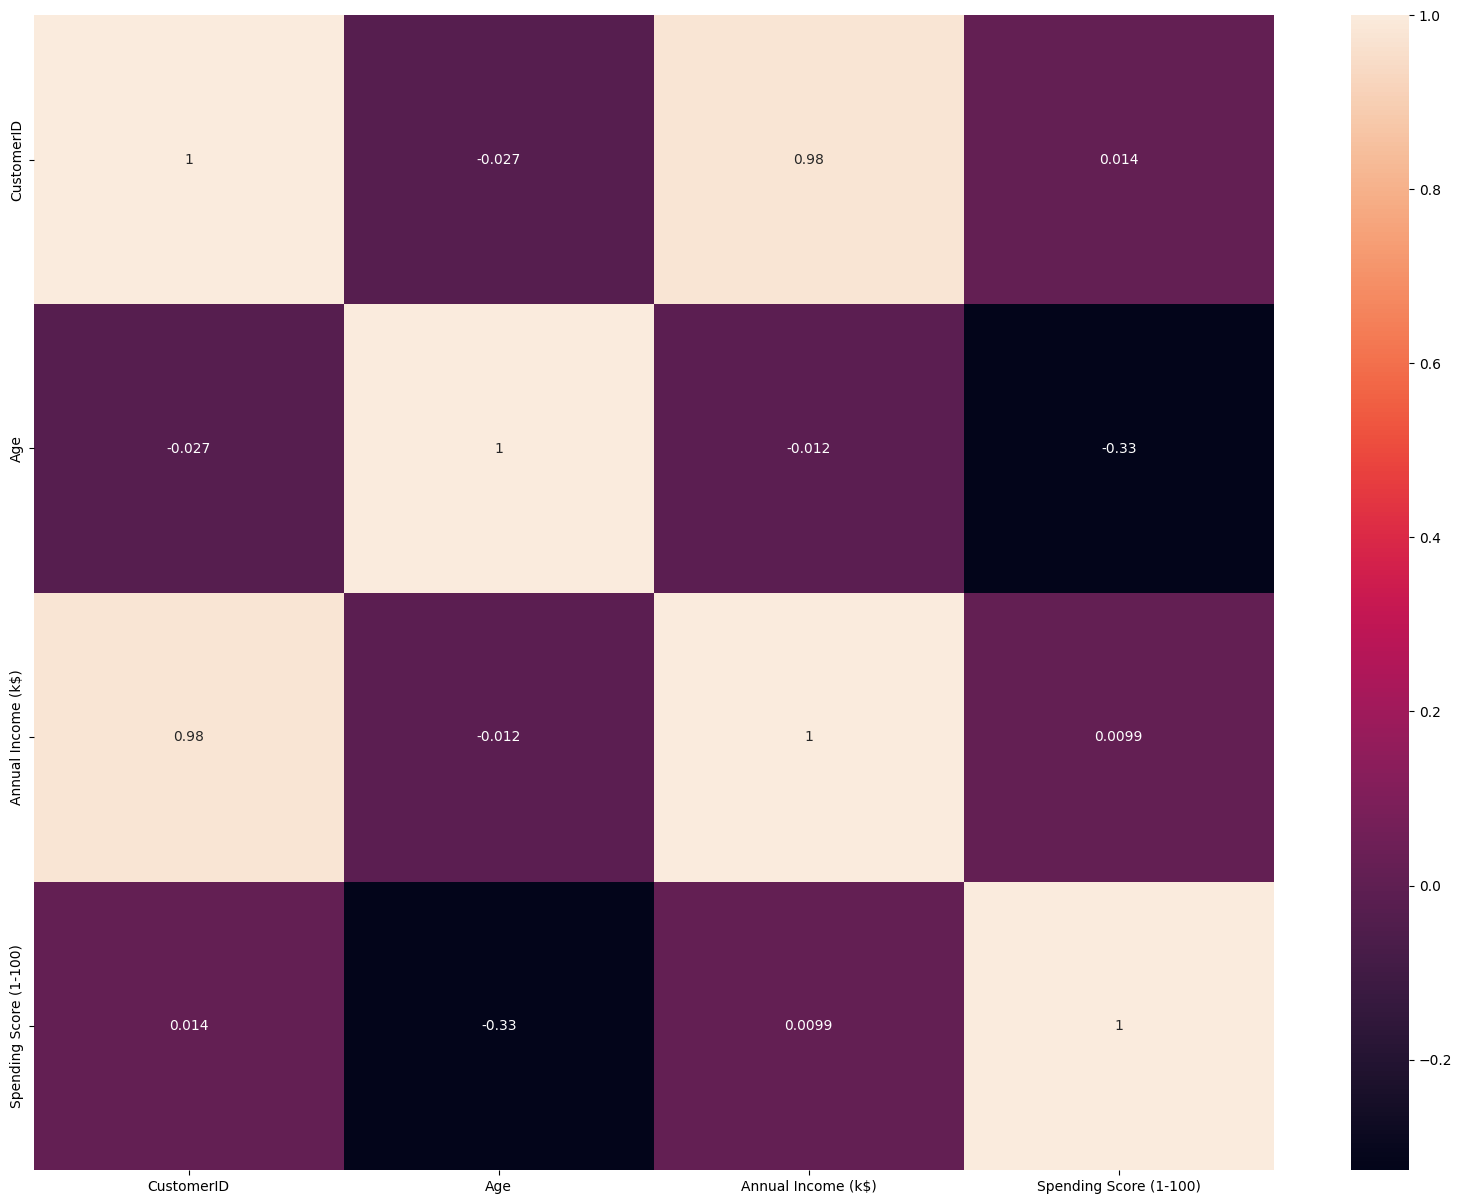

In [4]:
plt.subplots(figsize=(20,15))
sns.heatmap(corr,annot=True)

In [5]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dfe=df.copy()
dfe.Genre=le.fit_transform(df.Genre)
dfe.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [7]:
dfe.drop("CustomerID",inplace=True,axis="columns")

In [8]:
dfe.corrwith(dfe["Annual Income (k$)"],axis=0)

Genre                     0.056410
Age                      -0.012398
Annual Income (k$)        1.000000
Spending Score (1-100)    0.009903
dtype: float64

In [9]:
dfe.columns

Index(['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [10]:
X=dfe[['Genre', 'Spending Score (1-100)']]

In [11]:
from sklearn.preprocessing import normalize
X= normalize(X)

In [12]:
from sklearn.cluster import KMeans

In [13]:
k_range= range(1,11)
SSE =[]  # Sum of square errors
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(X)
    SSE.append(km.inertia_)

c:\Users\srikr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\srikr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\srikr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\srikr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

In [14]:
SSE 

[1.4695171264369282,
 0.3609363991987056,
 0.10579528835937863,
 0.03248061776692001,
 0.019010413286663835,
 0.01089879741145933,
 0.00625308547630934,
 0.003989360925184472,
 0.0025092625149786786,
 0.0017664137425824642]

In [15]:
km= KMeans(n_clusters=4)

In [16]:
y_predicted=km.fit_predict(X)
y_predicted

c:\Users\srikr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0,
       0, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 3, 0, 0, 0, 3, 0, 3, 0, 0, 0,
       3, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       3, 0])

In [17]:
km.score(X)

-0.03248061776692001

In [18]:
from sklearn.metrics import silhouette_score
silhouette_score(X,y_predicted)

0.8401946801554692